### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

The independent variable is a boolean variable: congruent. If one task is in congruent word condition, then congruent = true. Otherwise, congruent = false. 


The dependent variable is a continuous variable: the total time to finish one task.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

In this experiment, we will use paired t-test to analyze the Stroop Effect.
The assumptions for paired t-test are listed as follow:
* The dependent variable must be continuous (interval/ratio).
* The observations are independent of one another.
* The dependent variable should be approximately normally distributed.
* The dependent variable should not contain any outliers.

Null hypothesis $\mathcal{H}_0$: the mean difference between congruent and incongruent word condition is zero. 
Mathematically speaking: $\mu_d = 0$.

Alternative hypothesis $\mathcal{H}_1$: the mean difference between congruent and incongruent word condition is not zero. 
Mathematically speaking: $\mu_d \neq 0$.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Perform the analysis here
# load data
import pandas as pd
import numpy as np
import statistics
df = pd.read_csv('stroopdata.csv')
mat = df.values

#report mean
[cong_mean,incong_mean]= np.mean(mat, axis = 0)
print('-------------------------')
print('Mean: ')
print('congruent = ' + str(cong_mean))
print('incongruent = ' + str(incong_mean))

#report median
cong_median= statistics.median(mat[:, 0])
incong_median = statistics.median(mat[:, 1])
print('-------------------------')
print('Median: ')
print('congruent = ' + str(cong_median))
print('incongruent = ' + str(incong_median))

#report range
[cong_range, incong_range] = np.ptp(mat, axis = 0)
print('-------------------------')
print('Range: ')
print('congruent = ' + str(cong_range))
print('incongruent = ' + str(incong_range))

#report IQR
cong_iqr = np.subtract(*np.percentile(mat[:,0], [75, 25]))
incong_iqr = np.subtract(*np.percentile(mat[:,1], [75, 25]))
print('-------------------------')
print('IQR: ')
print('congruent = ' + str(cong_iqr))
print('incongruent = ' + str(incong_iqr))

-------------------------
Mean: 
congruent = 14.051125
incongruent = 22.0159166667
-------------------------
Median: 
congruent = 14.3565
incongruent = 21.0175
-------------------------
Range: 
congruent = 13.698
incongruent = 19.568
-------------------------
IQR: 
congruent = 4.3055
incongruent = 5.33475


We have computed some descriptive statistics above:

Mean: 
congruent = 14.051125; 
incongruent = 22.0159166667

Median: 
congruent = 14.3565; 
incongruent = 21.0175

Range: 
congruent = 13.698; 
incongruent = 19.568

IQR: 
congruent = 4.3055; 
incongruent = 5.33475

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

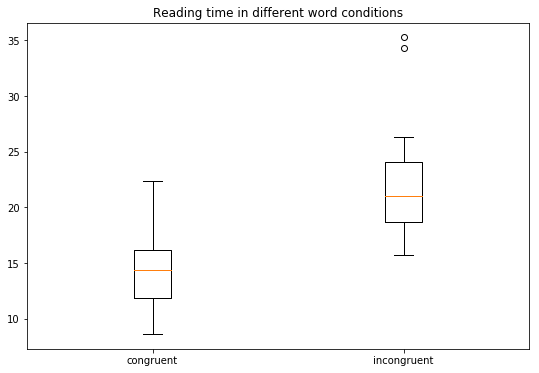

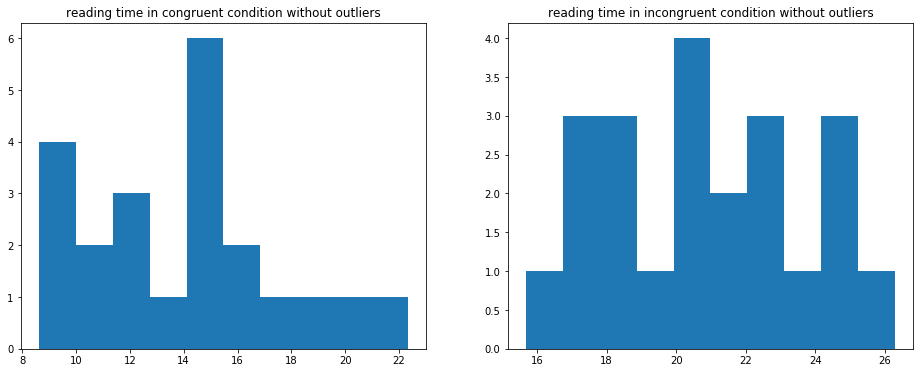

In [3]:
# Build the visualizations here
# use box plot to check outliers
import matplotlib as mpl
import matplotlib.pyplot as plt

fig0 = plt.figure(1,figsize = (9,6))
ax0 = fig0.add_subplot(1,1,1)
ax0.set_title('Reading time in different word conditions')
ax0.boxplot(mat)
bp = plt.xticks([1, 2], ['congruent', 'incongruent'])
plt.show()

# drop outliers showed in boxplot
def find_outliers(data):
    quartile_1, quartile_3 = np.percentile(data,[25, 75])
    iqr = quartile_3 - quartile_1
    lb = quartile_1 - iqr * 1.5
    ub = quartile_3 + iqr * 1.5
    return np.where((data > ub) | (data < lb))

def drop_outliers(matrix, col_index):
    outliers = find_outliers(matrix[:,col_index])
    result = np.delete(matrix,outliers[0],0)
    return result
        
mat_cleaned = drop_outliers(mat,1)

#use hist graph to check normal distribution assumption 
fig1 = plt.figure(1, figsize = (16,6))

ax0 = fig1.add_subplot(1,2,1)
ax1 = fig1.add_subplot(1,2,2)

ax0.set_title('reading time in congruent condition without outliers')
ax1.set_title('reading time in incongruent condition without outliers')

ax0.hist(mat_cleaned[:,0])
ax1.hist(mat_cleaned[:,1])
plt.show()

First, we use box plot to show some descriptive statistics in the two conditions. There are two outliers in the incongruent condition group, so we dropped them to conduct further analysis. 

Second, we use histogram to depict the distribution of reading time of one word list in congruent and incongruent word conditions. The distribution is bell-like and kind of symetric. Given the size of the dataset is so small, we consider the distribution of reading time in both conditions obeys normal distribution, which matches one of the assumption of paired t-test.

In addtion, from the box plot, we can see the majority of data points in incongruent group have larger value than the congruent group. We can also see that the median point in incongruent group is also larger than the one in congruent grouop. 

Based on these observation, we could assume that reading words in incongruent condition takes longer time than reading workd in congruent condition.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

Definition:
* $D$: difference between congruent and incongruent samples
* $\bar{D}$: sample mean of difference
* $\mu_d$: population mean of difference, we assume $\mu_d = 0$ under $\mathcal{H}_0$
* $n$: number of valid samples
* $S$: sample variance

Since reading time of congruent and incongruent both follow normal distribution and they are independent, the difference $D$ between them is also normal distributed. We can consider the pair t-test as one-sample t-test with population mean $\mu_d$ and sample $D$.

The test statistics is $T = \frac{\bar{D}-\mu_d}{S/\sqrt{n}}$ which follows Student's t-distribution.

Here we define significance level $\alpha = 0.05$.

Under $\mathcal{H}_0$, we have $\mu_d = 0$. Then we conduct the one-sample t-test with the cleaned dataset(without outliers) as follow:

In [4]:
import scipy.stats as stats
stats.ttest_1samp(a = mat_cleaned[:,1]- mat_cleaned[:,0], popmean = 0)

Ttest_1sampResult(statistic=9.5410999084921784, pvalue=4.3818916259231317e-09)

Or we could use paired t-test to get the same result:

In [5]:
stats.ttest_rel(a = mat_cleaned[:,1], b = mat_cleaned[:,0])

Ttest_relResult(statistic=9.5410999084921784, pvalue=4.3818916259231317e-09)

As you can see the p-value = 4.3818916259231317e-09 << $\alpha$ = 0.05, which means we should reject $\mathcal{H}_0$.

In addition, we can compute a $95\%$ confidence interval for $\mu_d$:

In [6]:
import math

D = mat_cleaned[:,1] - mat_cleaned[:,0]
n = len(mat_cleaned)

stats.t.interval(
    alpha = 0.95,
    df = n - 1,
    loc = np.mean(D, axis = 0),
    scale = np.std(D, axis = 0) / math.sqrt(n)
)

(5.4442585904930585, 8.3903777731433031)

From above, we can see $\mu_d = 0$ is not in the $95\%$ interval, which also means we should reject $\mathcal{H}_0$.